**Time Series Forecasting and Portfolio Optimization**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

**Fetching Data**

C:\Users\hp\AppData\Local\Temp\ipykernel_7936\2181368658.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(assets,start=start_date,end=end_date)
[*********************100%***********************]  3 of 3 completed


data.shape: (2535, 15)

Data Columns:
['Close', 'High', 'Low', 'Open', 'Volume']

 First 5 rows of the dataset
Price           Close                              High              \
Ticker            BND         SPY       TSLA        BND         SPY   
Date                                                                  
2015-07-01  60.816730  174.917130  17.943333  60.914456  175.363905   
2015-07-02  60.967083  174.756912  18.667999  61.027225  175.566173   
2015-07-06  61.177578  174.259567  18.648001  61.222687  175.043527   
2015-07-07  61.237713  175.355423  17.858667  61.470754  175.481864   
2015-07-08  61.410629  172.413467  16.997334  61.463252  174.293296   

Price                        Low                              Open  \
Ticker           TSLA        BND         SPY       TSLA        BND   
Date                                                                 
2015-07-01  18.174667  60.764108  174.124732  17.856667  60.794179   
2015-07-02  18.830000  60.937012  174.33

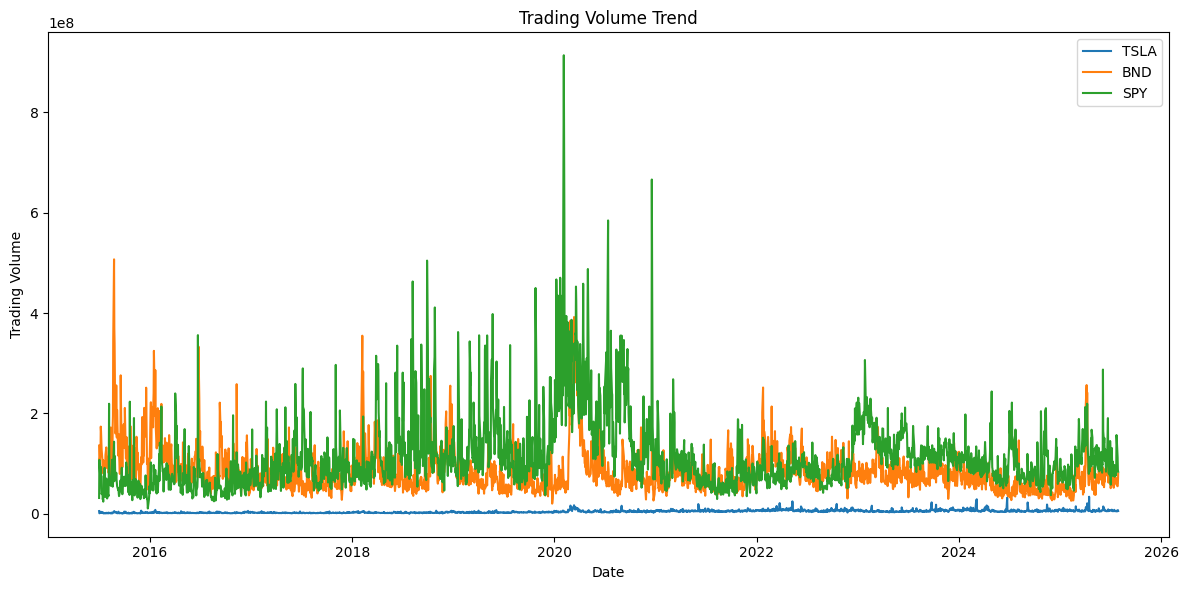

In [2]:
# Time period
start_date="2015-07-01"
end_date="2025-07-31"
# asset
assets=['TSLA','BND','SPY']

# Extracting Data
data=yf.download(assets,start=start_date,end=end_date)

# Generic Statistical Description

print("data.shape:", data.shape)
print("\nData Columns:")
print(data.columns.levels[0].tolist())

# Highlight of the dataset
print("\n First 5 rows of the dataset")
print(data.head())

# Extractiong of Adjusted Close prices
price=data['Close'].copy()

# Searching for missing values
print("\n Missing Values:")
print(price.isna().sum())

# Replacing Missing values with forwardfill
if price.isna().sum().any():
    price=price.fillna(method='ffill')
    print("Missing values filled using forward fill")

# Trading Volume Trend
plt.figure(figsize=(12,6))
plt.plot(data.index,data['Volume'],label=assets)
plt.title('Trading Volume Trend')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.legend()
plt.tight_layout()
plt.show()



Seasonality and Trends:
ADF Statistics of BND in price: -1.54
ADF Statistics of BND in daily return: -9.89
BND p-value in price: 0.52
BND p-value in daily return: 0.0
ADF Statistics of SPY in price: 0.69
ADF Statistics of SPY in daily return: -16.26
SPY p-value in price: 0.99
SPY p-value in daily return: 0.0
ADF Statistics of TSLA in price: -1.42
ADF Statistics of TSLA in daily return: -34.68
TSLA p-value in price: 0.57
TSLA p-value in daily return: 0.0

Volatility:
        annualized return  annualized volatility  sharpe ratio
Ticker                                                        
BND              0.019599               0.054919      0.356879
SPY              0.144844               0.182407      0.794072
TSLA             0.460690               0.591887      0.778340


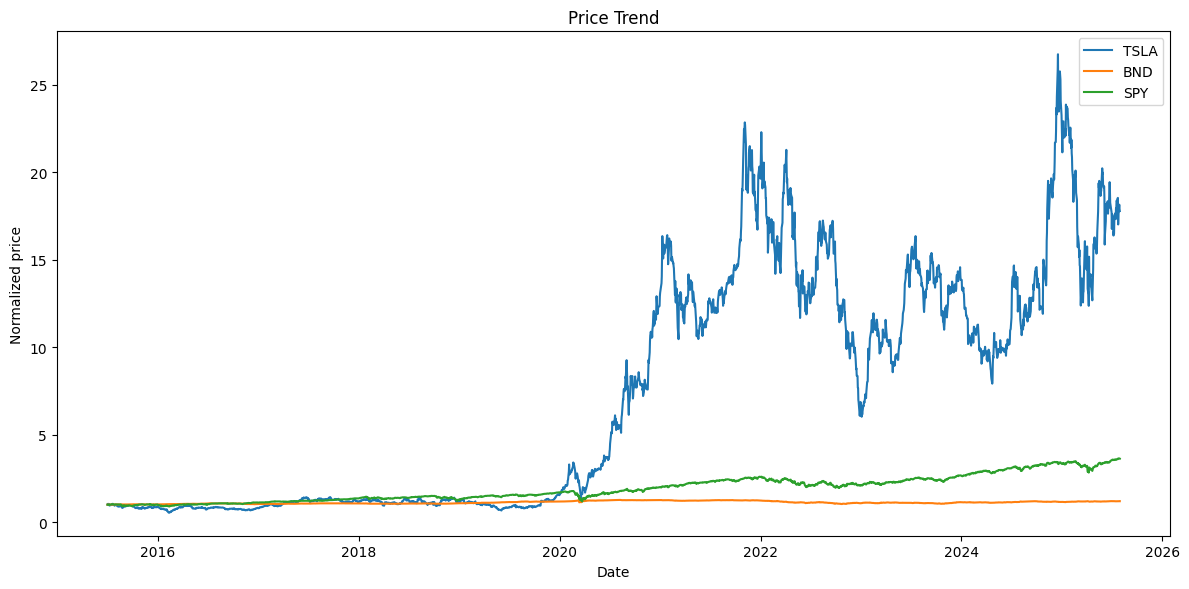

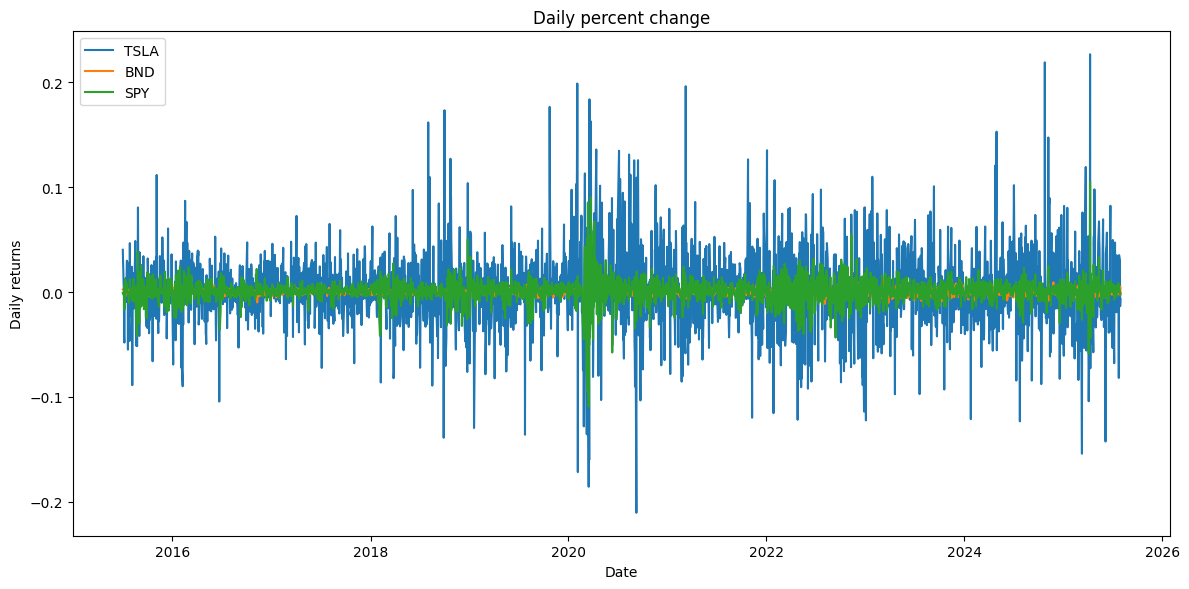

In [3]:
# Exploratory Data Analysis
# Daily returns
returns=price.pct_change().dropna()

#ploting price trend 

plt.figure(figsize=(12,6))
for asset in assets:
    plt.plot(price.index,price[asset]/price[asset].iloc[0],label=asset)
    plt.title('Price Trend')
    plt.ylabel('Normalized price')
    plt.xlabel('Date')
    plt.legend()
    plt.tight_layout()

# plot of teh change percentage
plt.figure(figsize=(12,6))
for ticker in assets:
    plt.plot(returns.index,returns[ticker],label=ticker)
    plt.title('Daily percent change')
    plt.ylabel('Daily returns')
    plt.xlabel('Date')
    plt.legend()
    plt.tight_layout()

# Seasonality and Trends

print("\nSeasonality and Trends:")
from statsmodels.tsa.stattools import adfuller

for tickers in price.columns:
    stats_price=adfuller(price[tickers])
    stats_return=adfuller(returns[tickers])
    print(f"ADF Statistics of {tickers} in price:",round(stats_price[0],2))
    print(f"ADF Statistics of {tickers} in daily return:",round(stats_return[0],2))
    print(f"{tickers} p-value in price:",round(stats_price[1],2))
    print(f"{tickers} p-value in daily return:",round(stats_return[1],2))

# Key statistics
print("\nVolatility:")
summary_stats=pd.DataFrame(index=returns.columns)
summary_stats['annualized return']=returns.mean() *252 # number of trading days in a year
summary_stats['annualized volatility']=returns.std() * np.sqrt(252)
summary_stats['sharpe ratio']= summary_stats['annualized return']/summary_stats['annualized volatility']
print(summary_stats[['annualized return','annualized volatility','sharpe ratio']])

In [4]:
# Timeseries Forcasting
from statsmodels.tsa.arima.model import ARIMA

# forcasting for Tesla stock prices 

asset_price=price['TSLA']
asset_return=returns['TSLA']

# Splitting dataset to training and test

split_date="2024-01-01"

train_data=asset_return.loc[asset_return.index<split_date]
test_data=asset_return.loc[asset_return.index>=split_date]


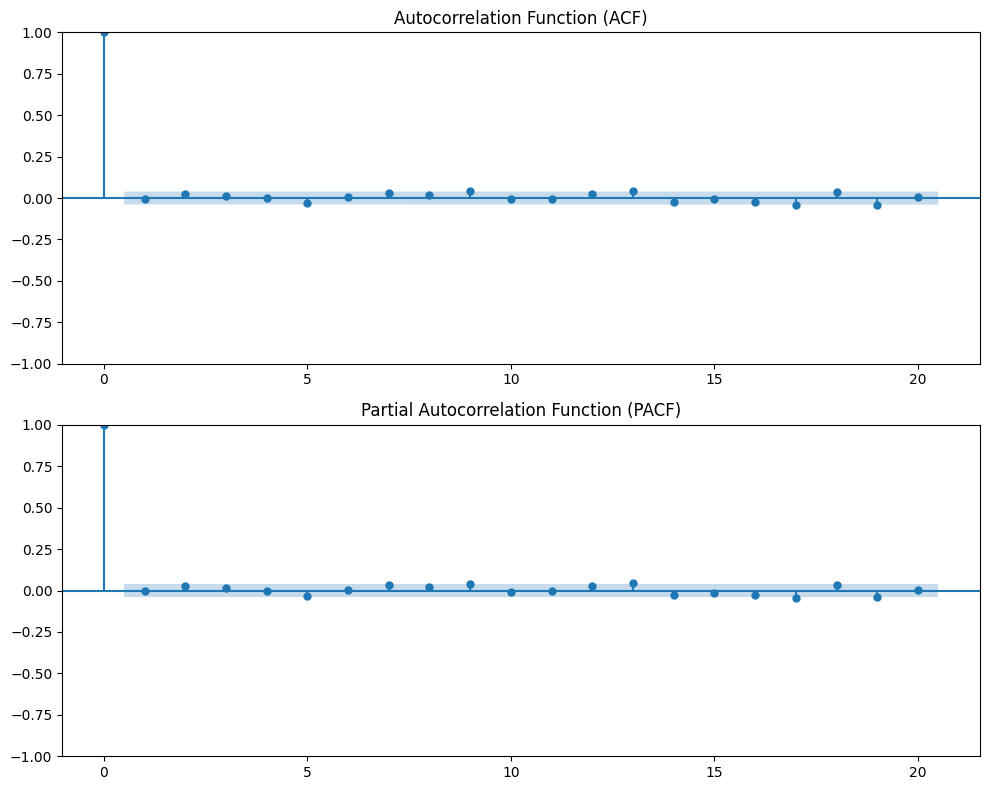

c:\Users\hp\Kifiya Projects\GMF-Investments-Portfolio-Management-with-Time-Series-Analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\Kifiya Projects\GMF-Investments-Portfolio-Management-with-Time-Series-Analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\Kifiya Projects\GMF-Investments-Portfolio-Management-with-Time-Series-Analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   TSLA   No. Observations:                 2139
Model:                 ARIMA(1, 0, 1)   Log Likelihood                4062.080
Date:                Thu, 14 Aug 2025   AIC                          -8116.160
Time:                        00:02:29   BIC                          -8093.488
Sample:                             0   HQIC                         -8107.864
                               - 2139                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.001      2.315      0.021       0.000       0.003
ar.L1          0.5382      0.792      0.679      0.497      -1.015       2.091
ma.L1         -0.5245      0.804     -0.653      0.5

c:\Users\hp\Kifiya Projects\GMF-Investments-Portfolio-Management-with-Time-Series-Analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\hp\Kifiya Projects\GMF-Investments-Portfolio-Management-with-Time-Series-Analysis\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



Model Evaluation on Test Data:
Mean Absolute Error (MAE): 0.030513
Root Mean Squared Error (RMSE): 0.042504


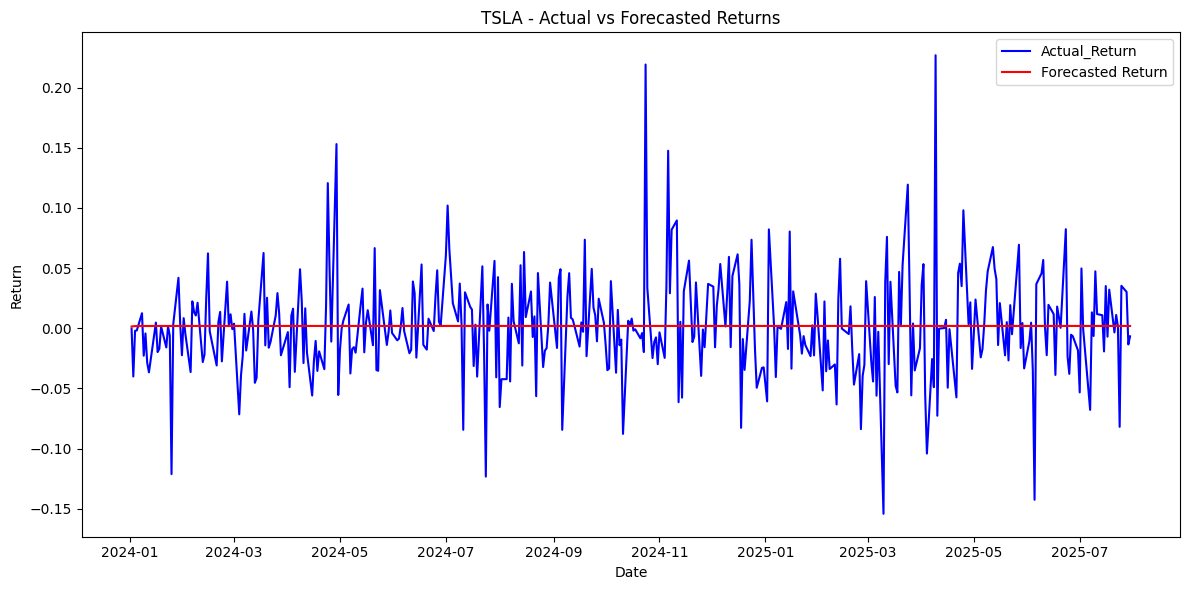

In [5]:
# Fit ARIMA model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# ACF plot to determine q

plot_acf(asset_return, ax=ax1, lags=20)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot to determine p
plot_pacf(asset_return, ax=ax2, lags=20)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

p,d,q =1,0,1 # d=0; daily percent change exhibit stationary behaviour so 

model = ARIMA(train_data, order=(p,d,q))
model_fit=model.fit()
print(model_fit.summary())

# forcast and evaluate

forcast_steps=len(test_data)
prediction=model_fit.forecast(steps=forcast_steps)

# computing error metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae=mean_absolute_error(test_data,prediction)
rmse=np.sqrt(mean_squared_error(test_data,prediction))
print(f"\nModel Evaluation on Test Data:")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")

# Plot actual vs forecast returns
plt.figure(figsize=(12,6))
plt.plot(test_data.index,test_data,label='Actual_Return',color='blue')
plt.plot(test_data.index,prediction,label='Forecasted Return',color='red')
plt.title(f'TSLA - Actual vs Forecasted Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.tight_layout()


c:\Users\hp\Kifiya Projects\GMF-Investments-Portfolio-Management-with-Time-Series-Analysis\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\hp\Kifiya Projects\GMF-Investments-Portfolio-Management-with-Time-Series-Analysis\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\hp\Kifiya Projects\GMF-Investments-Portfolio-Management-with-Time-Series-Analysis\.venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning:

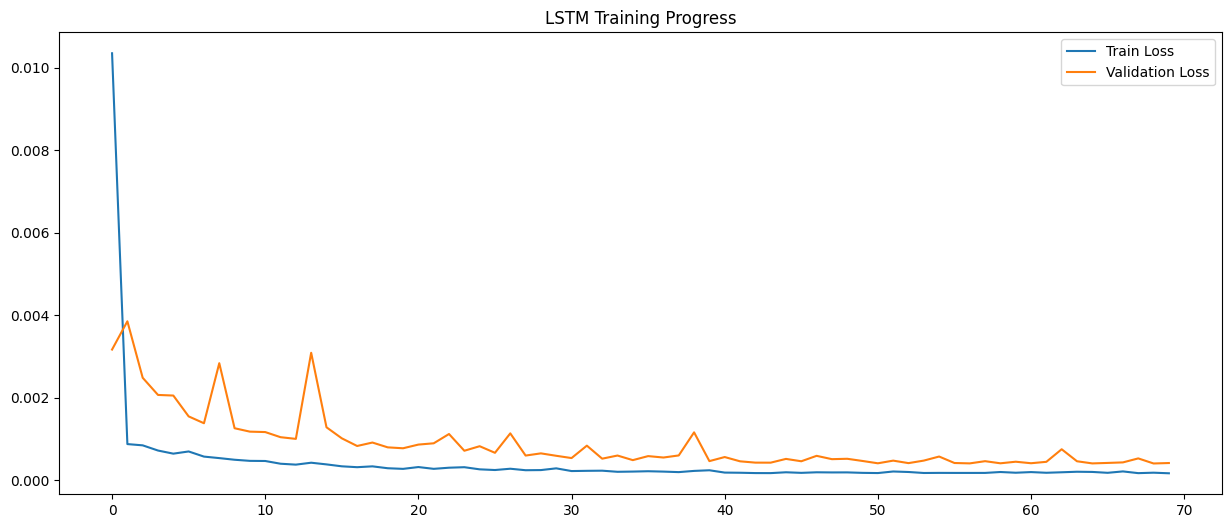

In [ ]:
# Fit LSTM Forecasting 

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

data_close=data['Close']

#preparing data
scaler=MinMaxScaler()
scaled=scaler.fit_transform(data_close['TSLA'].values.reshape(-1,1))
# creating sequence

def create_sequences(dat,window=60): 
    X, y = [],[]     #window is num. days per training sample
    for i in range(len(dat)-window):
        X.append(dat[i:i+window])
        y.append(dat[i+window])
    return np.array(X), np.array(y)

X ,y = create_sequences(scaled)
X_train ,X_test = X[:-100] , X[-100:]
y_train, y_test = y[:-100] , y[-100:]

# Build LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train
history = model.fit(X_train, y_train, epochs=70, batch_size=32,  # batch-size num. of samples per epoch
                   validation_split=0.2, verbose=0)

# Plot training loss
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training Progress')
plt.legend()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step


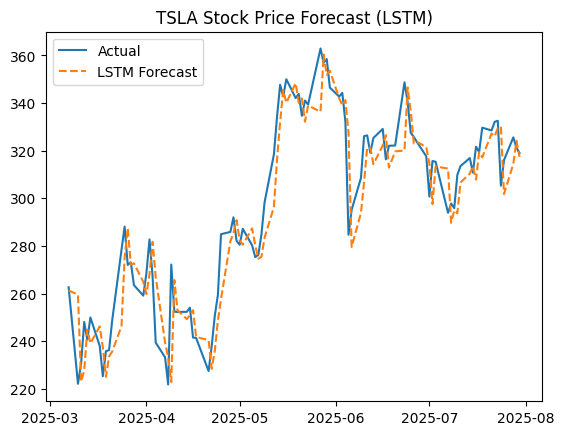

In [7]:
# Predict
lstm_forecast = model.predict(X_test)
lstm_forecast = scaler.inverse_transform(lstm_forecast).flatten()

# Plot LSTM results
plt.Figure(figsize=(15,6))
plt.plot(data_close['TSLA'].index[-100:], data_close['TSLA'][-100:], label='Actual')
plt.plot(data_close['TSLA'].index[-100:], lstm_forecast, label='LSTM Forecast', linestyle='--')
plt.title('TSLA Stock Price Forecast (LSTM)')
plt.legend()
plt.show()

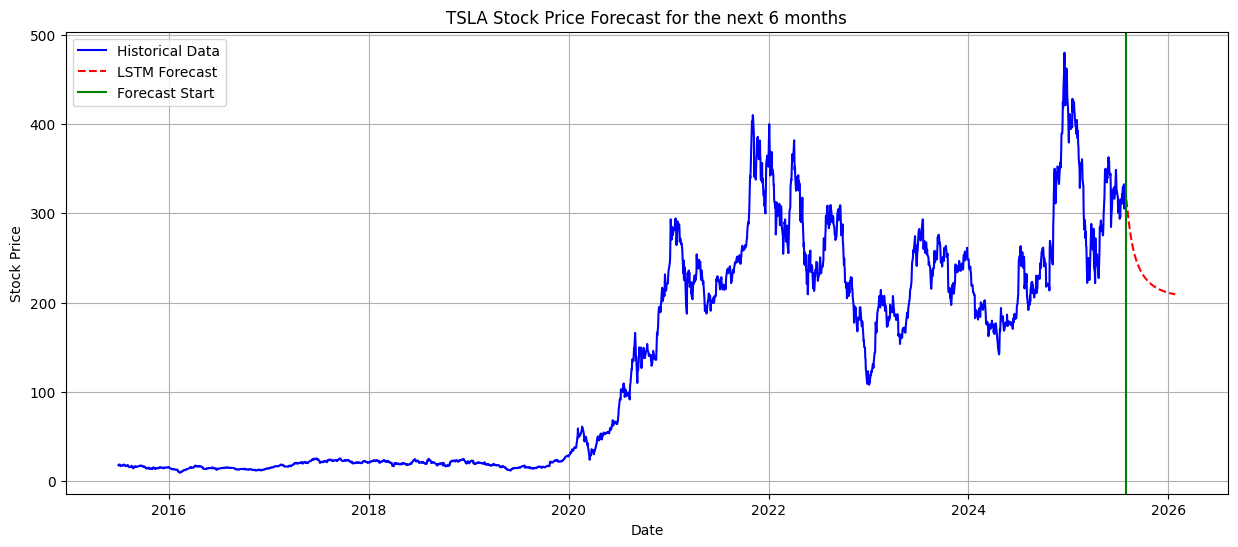

In [13]:
# Assuming 'data_scaled' is your scaled time series data
# and 'window_size' is the number of time steps used for training (e.g., 60)
last_60_days = scaled[-100:]
# Reshape to the required 3D format: (1, window_size, 1)
initial_input = np.reshape(last_60_days, (1, 100, 1))

# Assuming 'model' is your trained LSTM model
# and 'scaler' is the MinMaxScaler used for the data
forecast_steps = 180 # For a 6-month forecast
forecast_list = []
current_input = initial_input.copy()

for _ in range(forecast_steps):
    # Predict the next time step
    next_step_scaled = model.predict(current_input, verbose=0)
    
    # Store the raw scaled prediction
    forecast_list.append(next_step_scaled[0, 0])
    
    # Update the input sequence by adding the new prediction
    # and removing the oldest value
    current_input = np.append(current_input[:, 1:, :], next_step_scaled.reshape(1, 1, 1), axis=1)

# Convert the list of scaled forecasts into a NumPy array
lstm_forecast_scaled = np.array(forecast_list).reshape(-1, 1)
# Inverse transform the entire forecast to get actual prices
lstm_forecast = scaler.inverse_transform(lstm_forecast_scaled)

# Assuming 'data_close' is your original DataFrame with a DatetimeIndex
# Create a date range for the forecast period
last_date = data_close.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_steps + 1)[1:]

plt.figure(figsize=(15, 6))
# Plot the historical data
plt.plot(data_close.index, data_close['TSLA'], label='Historical Data', color='blue')
# Plot the forecast
plt.plot(future_dates, lstm_forecast, label='LSTM Forecast', linestyle='--', color='red')
plt.axvline(x=data_close.index[-1], color='green', linestyle='-', label='Forecast Start')
plt.title('TSLA Stock Price Forecast for the next 6 months')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()
